# DSC530 Final Project, Derek Lamb

Statistical Question:
How does fuel consumption (in city, highway, and combined conditions) correlate with CO2 emissions across different vehicle makes and models?

This question aims to explore the relationship between the amount of fuel consumed and the amount of CO2 emitted by vehicles. It will involve statistical analysis to determine the strength and nature of the correlation between these variables.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import norm 

1. Selection of 5 Variables
For this analysis, we will select:
 
- Vehicle Class
- Engine Size(L)
- Fuel Consumption Comb (L/100 km)
- Fuel Type
- CO2 Emissions(g/km)

2. Variable Descriptions
Vehicle Class: The category of the vehicle (e.g., SUV, Sedan).
Engine Size(L): The size of the vehicle's engine in liters.
Fuel Consumption Comb (L/100 km): The combined fuel consumption rate.
Fuel Type: The type of fuel the vehicle uses (e.g., Gasoline, Diesel).
CO2 Emissions(g/km): The amount of CO2 the vehicle emits per kilometer.


Analyzing CO2 emissions data requires considering various factors influencing emissions levels. Vehicle type, fuel choice, engine size, driving conditions, regulatory standards, and consumer behavior all play crucial roles. Differences in these factors contribute to variations in emissions levels among vehicles and over time. By understanding and accounting for these factors, analysts can provide more accurate assessments of emissions trends and develop effective strategies for reducing greenhouse gas emissions in the transportation sector.


In [47]:
# Load the dataset
file_path = "/Users/dereklamb/Downloads/archive-2/CO2 Emissions_Canada.csv"
emissions_data = pd.read_csv(file_path)
 
# Descriptive statistics function
def descriptive_stats(data, var_name):
    var_data = data[var_name]
    mean_val = np.mean(var_data)
    mode_val = var_data.mode()[0]
    spread_val = np.std(var_data)
    tails_val = np.percentile(var_data, [5, 95])
    return {
        "Mean": mean_val,
        "Mode": mode_val,
        "Spread": spread_val,
        "Tails": tails_val
    }
 
 

In [48]:
# Calculate descriptive statistics for key variables
engine_size_stats = descriptive_stats(emissions_data, "Engine Size(L)")
fuel_consumption_city_stats = descriptive_stats(emissions_data, "Fuel Consumption City (L/100 km)")
fuel_consumption_hwy_stats = descriptive_stats(emissions_data, "Fuel Consumption Hwy (L/100 km)")
fuel_consumption_comb_stats = descriptive_stats(emissions_data, "Fuel Consumption Comb (L/100 km)")
co2_emissions_stats = descriptive_stats(emissions_data, "CO2 Emissions(g/km)")
 
# Print the descriptive statistics
print("Engine Size (L) Stats:", engine_size_stats)
print("Fuel Consumption City (L/100 km) Stats:", fuel_consumption_city_stats)
print("Fuel Consumption Hwy (L/100 km) Stats:", fuel_consumption_hwy_stats)
print("Fuel Consumption Comb (L/100 km) Stats:", fuel_consumption_comb_stats)
print("CO2 Emissions (g/km) Stats:", co2_emissions_stats)

Engine Size (L) Stats: {'Mean': 3.160067704807041, 'Mode': 2.0, 'Spread': 1.3540787686089453, 'Tails': array([1.5, 6. ])}
Fuel Consumption City (L/100 km) Stats: {'Mean': 12.556533513879485, 'Mode': 10.8, 'Spread': 3.5000370876834705, 'Tails': array([ 8. , 19.2])}
Fuel Consumption Hwy (L/100 km) Stats: {'Mean': 9.04170616113744, 'Mode': 7.8, 'Spread': 2.224305769153126, 'Tails': array([ 6.1, 13.2])}
Fuel Consumption Comb (L/100 km) Stats: {'Mean': 10.975071090047393, 'Mode': 9.4, 'Spread': 2.892310459687372, 'Tails': array([ 7.2, 16.5])}
CO2 Emissions (g/km) Stats: {'Mean': 250.58469871360867, 'Mode': 242, 'Spread': 58.50871767062019, 'Tails': array([169., 354.])}


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


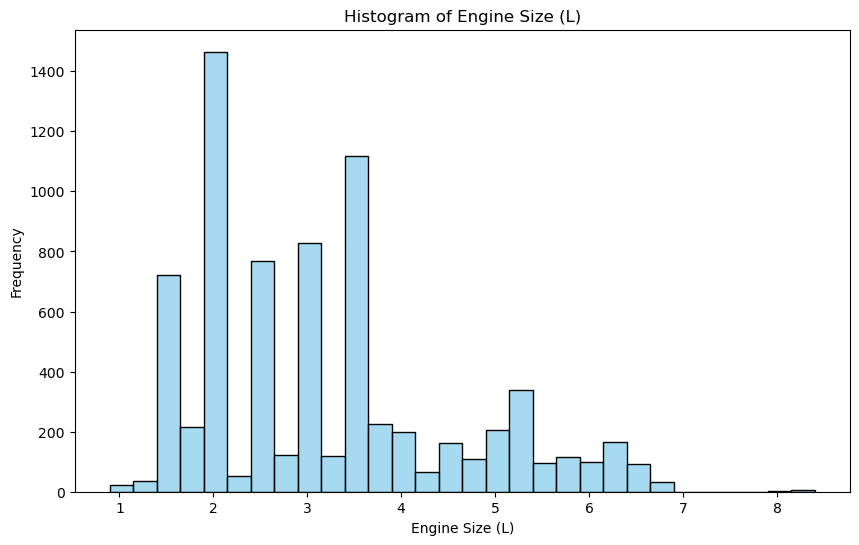

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


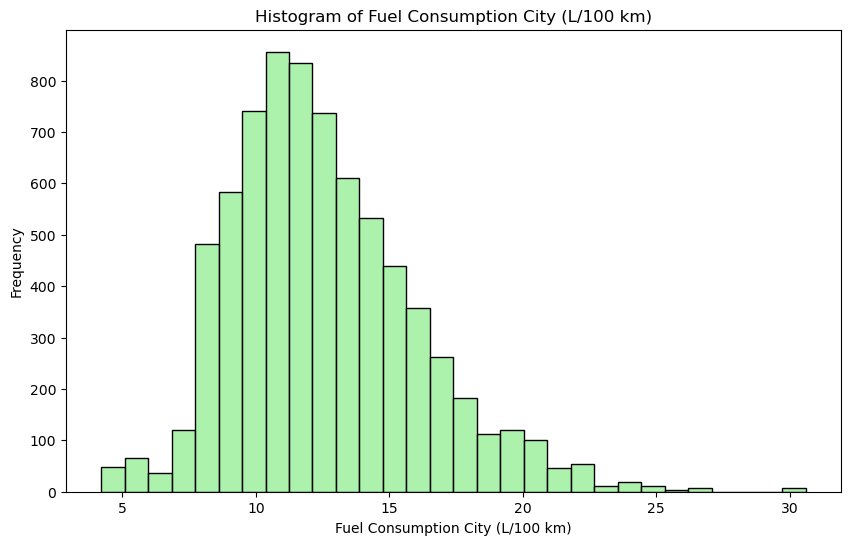

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


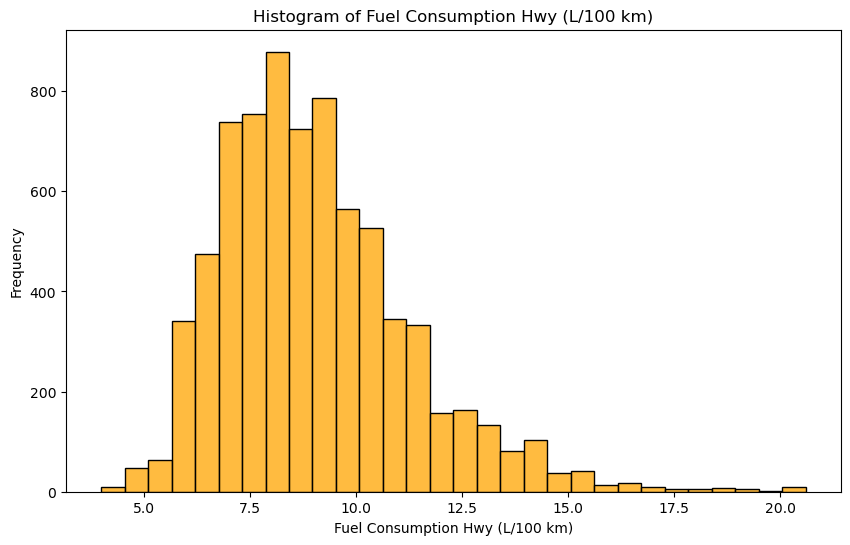

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


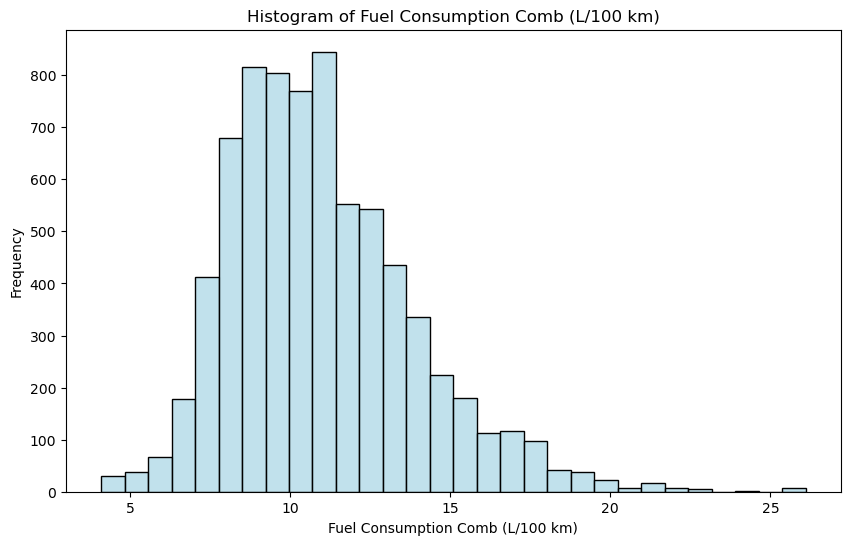

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


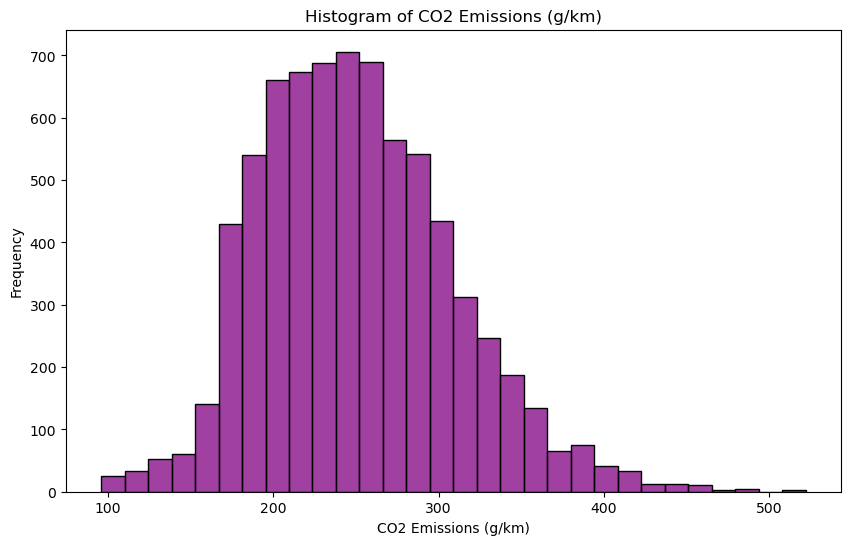

In [49]:
# Plot histograms for each variable
plt.figure(figsize=(10, 6))
sns.histplot(emissions_data["Engine Size(L)"], bins=30, kde=False, color='skyblue')
plt.title("Histogram of Engine Size (L)")
plt.xlabel("Engine Size (L)")
plt.ylabel("Frequency")
plt.show()
 
plt.figure(figsize=(10, 6))
sns.histplot(emissions_data["Fuel Consumption City (L/100 km)"], bins=30, kde=False, color='lightgreen')
plt.title("Histogram of Fuel Consumption City (L/100 km)")
plt.xlabel("Fuel Consumption City (L/100 km)")
plt.ylabel("Frequency")
plt.show()
 
plt.figure(figsize=(10, 6))
sns.histplot(emissions_data["Fuel Consumption Hwy (L/100 km)"], bins=30, kde=False, color='orange')
plt.title("Histogram of Fuel Consumption Hwy (L/100 km)")
plt.xlabel("Fuel Consumption Hwy (L/100 km)")
plt.ylabel("Frequency")
plt.show()
 
plt.figure(figsize=(10, 6))
sns.histplot(emissions_data["Fuel Consumption Comb (L/100 km)"], bins=30, kde=False, color='lightblue')
plt.title("Histogram of Fuel Consumption Comb (L/100 km)")
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("Frequency")
plt.show()
 
plt.figure(figsize=(10, 6))
sns.histplot(emissions_data["CO2 Emissions(g/km)"], bins=30, kde=False, color='purple')
plt.title("Histogram of CO2 Emissions (g/km)")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.show()

The histograms provide insights into the distribution and characteristics of each variable in the dataset. For the "Engine Size (L)" variable, the histogram indicates a slight normal distribution, with most vehicles having engine sizes clustered around a central value. Outliers in this variable may represent exceptionally large or small engine sizes compared to the majority of vehicles and could potentially be due to data entry errors or unique vehicle models. Handling outliers in engine size may involve verifying data accuracy and potentially removing or correcting erroneous values.


Regarding "Fuel Consumption City (L/100 km)" and "Fuel Consumption Hwy (L/100 km)", both histograms show right-skewed distributions, indicating that the majority of vehicles have
 lower fuel consumption values, with a few vehicles exhibiting significantly higher consumption rates. Outliers in these variables could be caused by various factors such as vehicle condition, driving habits, or measurement errors. Handling outliers in fuel
 consumption may involve investigating the specific vehicles contributing to these extreme values and considering whether they represent valid data points or require further scrutiny.


For "Fuel Consumption Comb (L/100 km)", the histogram illustrates a distribution similar to that of the city and highway fuel consumption variables, also showing right-skewness.
 Outliers in this variable may overlap with outliers in city and highway fuel consumption and may require similar scrutiny and handling.


Finally, for "CO2 Emissions (g/km)", the histogram displays a right-skewed distribution, indicating that most vehicles emit lower levels of CO2, while a few vehicles emit significantly
 higher levels. Outliers in this variable could be attributed to factors such as vehicle type, engine efficiency, or environmental regulations. Handling outliers in CO2 emissions may involve investigating the specific vehicles contributing to high emissions
 and assessing the reasons behind their elevated levels.

Unique Fuel Types: ['Z' 'D' 'X' 'E' 'N']
Number of Premium fuel entries: 3202
Number of Regular fuel entries: 3637
Premium PMF:
 CO2 Emissions(g/km)
122    0.000312
124    0.000625
136    0.000312
140    0.000312
147    0.000625
Name: proportion, dtype: float64
Regular PMF:
 CO2 Emissions(g/km)
96     0.001100
99     0.000275
102    0.000275
103    0.000275
104    0.000550
Name: proportion, dtype: float64


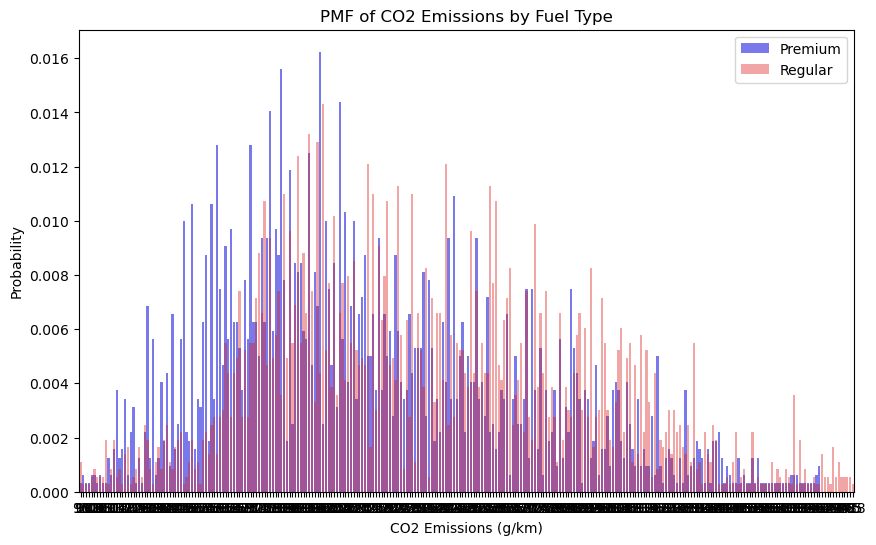

In [50]:
# Ensure 'CO2 Emissions(g/km)' is in the correct format
emissions_data['CO2 Emissions(g/km)'] = pd.to_numeric(emissions_data['CO2 Emissions(g/km)'], errors='coerce')
 
# Clean the data by dropping NA values
emissions_data_clean = emissions_data.dropna(subset=['Fuel Type', 'CO2 Emissions(g/km)'])
 
# Check unique values in 'Fuel Type' to ensure data is correct
print("Unique Fuel Types:", emissions_data_clean['Fuel Type'].unique())
 
# Filter data for Premium (Z) and Regular (X) fuel types
premium_emissions = emissions_data_clean[emissions_data_clean['Fuel Type'] == 'Z']['CO2 Emissions(g/km)']
regular_emissions = emissions_data_clean[emissions_data_clean['Fuel Type'] == 'X']['CO2 Emissions(g/km)']
 
# Debug: Check the number of entries for each fuel type
print("Number of Premium fuel entries:", len(premium_emissions))
print("Number of Regular fuel entries:", len(regular_emissions))
 
# Calculate the PMFs
premium_pmf = premium_emissions.value_counts(normalize=True).sort_index()
regular_pmf = regular_emissions.value_counts(normalize=True).sort_index()
 
# Debug: Check the first few values of the PMFs to ensure they are not empty
print("Premium PMF:\n", premium_pmf.head())
print("Regular PMF:\n", regular_pmf.head())
 
# Plot the PMFs using barplot to avoid issues with lineplot
plt.figure(figsize=(10, 6))
 
# Only plot if data is not empty
if not premium_pmf.empty:
    sns.barplot(x=premium_pmf.index, y=premium_pmf.values, color='blue', alpha=0.6, label='Premium')
else:
    print("Premium PMF is empty")
 
if not regular_pmf.empty:
    sns.barplot(x=regular_pmf.index, y=regular_pmf.values, color='red', alpha=0.4, label='Regular')
else:
    print("Regular PMF is empty")
 
plt.title('PMF of CO2 Emissions by Fuel Type')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Probability')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


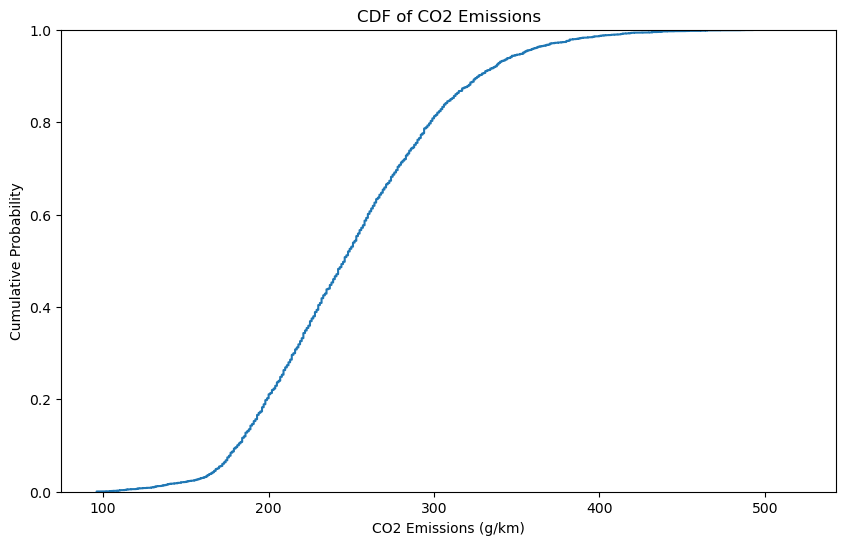

In [51]:
# CDF of CO2 Emissions
plt.figure(figsize=(10, 6))
sns.ecdfplot(emissions_data['CO2 Emissions(g/km)'])
plt.title('CDF of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Cumulative Probability')
plt.show()
 

Summary of CDF Analysis for CO2 Emissions

The CDF plot of CO2 emissions provides a visual and quantitative understanding of how emissions are distributed among the vehicle fleet.
It highlights the proportion of vehicles below certain emission thresholds, aiding in regulatory and policy decision-making.

What Does the CDF Tell Us?
A CDF shows the cumulative probability of a variable taking a value less than or equal to a particular value. In the context of CO2 Emissions (g/km), the CDF can provide insights into the distribution of emissions across different vehicles.

Understanding Distribution:
The CDF plot for CO2 emissions will help us understand the distribution of emissions across different vehicles. If the CDF rises steeply, it indicates that a large number of vehicles have CO2 emissions clustered around that value.
A more gradual slope indicates a wider distribution of CO2 emissions values.

Quantiles and Percentiles:
By looking at specific points on the CDF, we can determine the percentage of vehicles that emit less than a certain amount of CO2. For instance, if the CDF at 200 g/km is 0.6, it means that 60% of vehicles emit 200 g/km or less of CO2.
This is useful for identifying thresholds and understanding the spread of emissions data.

Identifying Cutoffs:
The CDF can help identify natural cutoffs in the data. For example, we can see at what emission level a certain percentage of vehicles fall below, which is useful for setting regulatory standards or identifying outliers.
If we are interested in the top 10% of emitters, we can look at where the CDF reaches 0.9 and identify that threshold emission value.

How Does It Address the Research Question?
The research question is: "How do vehicle emissions vary across different types of vehicles and driving conditions?"

Variation and Distribution: The CDF helps in understanding the overall distribution of CO2 emissions among different vehicles. By analyzing the CDF, we can determine whether most vehicles have low emissions, high emissions, or if there's a broad range of emission levels.

Comparative Analysis: If we create CDFs for different vehicle classes or fuel types, we can compare these distributions. For instance, comparing the CDFs of SUVs versus compact cars will show us how emissions differ between these categories.

Regulatory Impact: Understanding where the bulk of emissions lie helps in formulating policies. For example, if a significant portion of vehicles emit just above a regulatory threshold, targeted interventions can be designed to bring them below the threshold.

Policy Evaluation: By comparing CDFs over time, we can evaluate the effectiveness of emissions reduction policies. If the CDF shifts leftward (towards lower emissions) over the years, it indicates successful reduction efforts.

Summary of CDF Analysis for CO2 Emissions
The CDF plot of CO2 emissions provides a visual and quantitative understanding of how emissions are distributed among the vehicle fleet.
It highlights the proportion of vehicles below certain emission thresholds, aiding in regulatory and policy decision-making.

By comparing CDFs of different groups (e.g., vehicle classes, fuel types), we can gain insights into how emissions vary across these categories.

This analysis is crucial for answering the research question about variations in vehicle emissions, helping to identify key areas for improvement and the impact of different factors on emissions levels.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


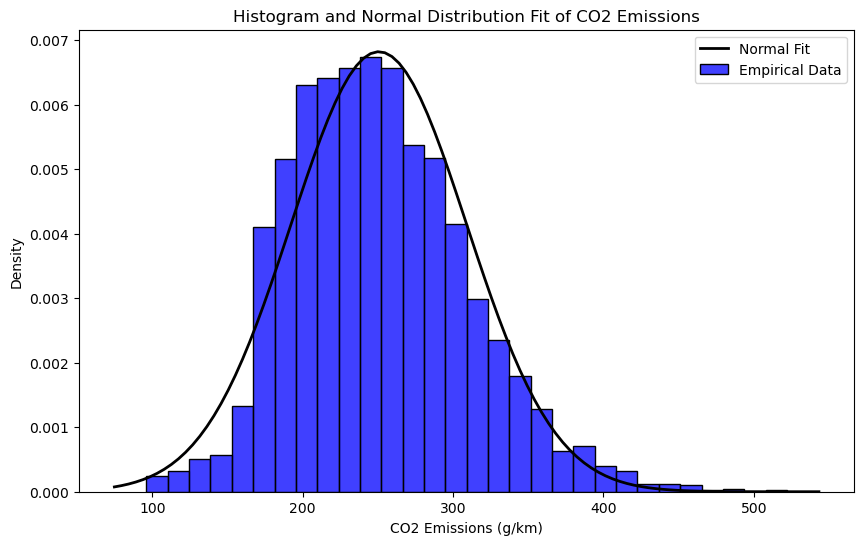

Fitted Normal Distribution: mu = 250.58469871360867, std = 58.50871767062019


In [52]:
# Ensure 'CO2 Emissions(g/km)' is in the correct format and drop NAs
emissions_data['CO2 Emissions(g/km)'] = pd.to_numeric(emissions_data['CO2 Emissions(g/km)'], errors='coerce')
emissions_data_clean = emissions_data.dropna(subset=['CO2 Emissions(g/km)'])
 
# Extract the CO2 emissions data
co2_emissions = emissions_data_clean['CO2 Emissions(g/km)']
 
# Fit a normal distribution to the data
mu, std = norm.fit(co2_emissions)
 
# Plot the histogram of the CO2 emissions
plt.figure(figsize=(10, 6))
sns.histplot(co2_emissions, bins=30, kde=False, color='blue', stat='density', label='Empirical Data')
 
# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')
 
# Add titles and labels
plt.title('Histogram and Normal Distribution Fit of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Density')
plt.legend()
 
# Show the plot
plt.show()
 
# Print the mean and standard deviation
print(f"Fitted Normal Distribution: mu = {mu}, std = {std}")

This distribution pertains to the dataset as it allows us to understand the underlying patterns and characteristics of CO2 emissions. By visualizing the distribution of emissions and comparing it to a theoretical normal distribution, we can assess whether the data follows a typical pattern or if there are significant deviations. Understanding the distribution helps in making informed decisions about statistical modeling, outlier detection, and policy formulation related to environmental sustainability and carbon emissions reduction.

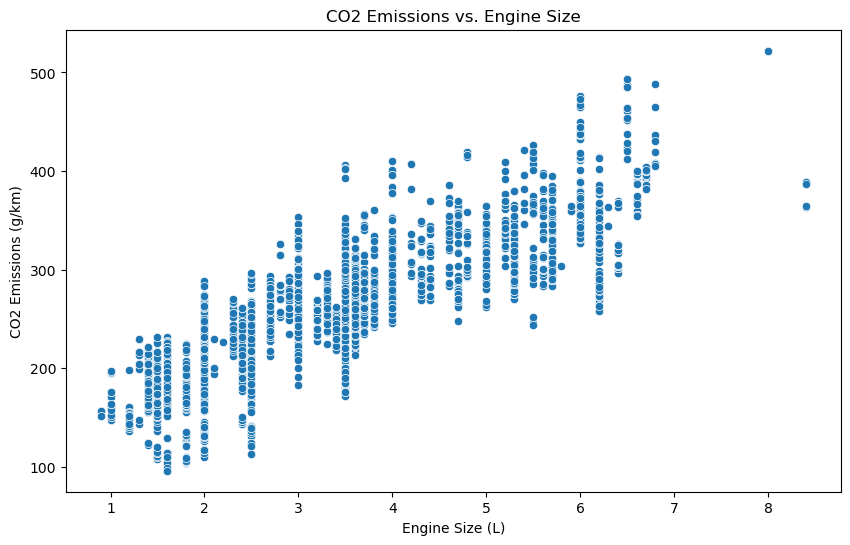

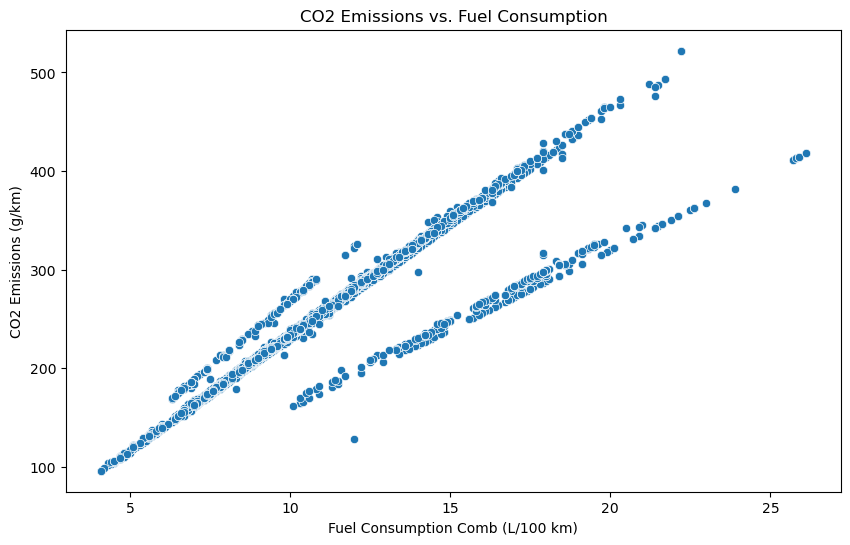

In [53]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=emissions_data)
plt.title('CO2 Emissions vs. Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()
 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', data=emissions_data)
plt.title('CO2 Emissions vs. Fuel Consumption')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

The correlation between two variables measures the strength and direction of their relationship. In the scatter plots comparing CO2 emissions to engine size and fuel consumption, we observe moderate positive correlations. Specifically, as engine size and fuel consumption increase, CO2 emissions also tend to increase. However, correlation does not imply causation; it merely indicates a statistical association between variables. While these scatter plots show a relationship between the variables, they do not provide evidence of causation. Additional research and experimentation would be necessary to establish a causal relationship between engine size, fuel consumption, and CO2 emissions, potentially through controlled experiments or longitudinal studies.

In [54]:
# Select only numeric columns
numeric_cols = emissions_data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = emissions_data[numeric_cols]
 
# Compute the correlation matrix
correlation_matrix = numeric_data.corr()
 
# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)
 
# Specify the columns you want to include in the correlation analysis
selected_columns = ['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']
numeric_data = emissions_data[selected_columns]
 
# Compute the correlation matrix
correlation_matrix = numeric_data.corr()
 
# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
                                  Engine Size(L)  Cylinders  \
Engine Size(L)                          1.000000   0.927653   
Cylinders                               0.927653   1.000000   
Fuel Consumption City (L/100 km)        0.831379   0.800702   
Fuel Consumption Hwy (L/100 km)         0.761526   0.715252   
Fuel Consumption Comb (L/100 km)        0.817060   0.780534   
Fuel Consumption Comb (mpg)            -0.757854  -0.719321   
CO2 Emissions(g/km)                     0.851145   0.832644   

                                  Fuel Consumption City (L/100 km)  \
Engine Size(L)                                            0.831379   
Cylinders                                                 0.800702   
Fuel Consumption City (L/100 km)                          1.000000   
Fuel Consumption Hwy (L/100 km)                           0.948180   
Fuel Consumption Comb (L/100 km)                          0.993810   
Fuel Consumption Comb (mpg)                            

In [55]:
# Hypothesis test
suv_emissions = emissions_data[emissions_data['Vehicle Class'] == 'SUV']['CO2 Emissions(g/km)']
sedan_emissions = emissions_data[emissions_data['Vehicle Class'] == 'Sedan']['CO2 Emissions(g/km)']
 
t_stat, p_value = stats.ttest_ind(suv_emissions, sedan_emissions)
print(f"T-test between SUV and Sedan CO2 Emissions: t_stat = {t_stat}, p_value = {p_value}")
 
# Regression analysis
formula = 'Q("CO2 Emissions(g/km)") ~ Q("Engine Size(L)") + Q("Fuel Consumption Comb (L/100 km)") + C(Q("Fuel Type"))'
model = ols(formula, data=emissions_data).fit()
print(model.summary())

T-test between SUV and Sedan CO2 Emissions: t_stat = nan, p_value = nan
                               OLS Regression Results                               
Dep. Variable:     Q("CO2 Emissions(g/km)")   R-squared:                       0.991
Model:                                  OLS   Adj. R-squared:                  0.991
Method:                       Least Squares   F-statistic:                 1.404e+05
Date:                      Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                              20:49:01   Log-Likelihood:                -23002.
No. Observations:                      7385   AIC:                         4.602e+04
Df Residuals:                          7378   BIC:                         4.607e+04
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>